In [38]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Test_Sales_Data.csv')

In [3]:
df.head()

,index,Sale,Name,Previous Product Count,Number of Previous Credit Checks,Downpayment (thousands),Year of Birth
0,0,0,Mr. Owen Harris Braund,1,0,$7.25,1970/02/09
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,0,USD 71.2833,1954/05/26
2,2,1,Miss. Laina Heikkinen,0,0,$7.93,1966/06/25
3,3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,0,$53.10,1957
4,4,0,Mr. William Henry Allen,0,0,USD8.05,1957/11/12


In [4]:
df.describe()

,index,Sale,Previous Product Count,Number of Previous Credit Checks
count,1774.000000,1774.000000,1774.000000,1774.000000
mean,443.000000,0.385569,0.525366,0.383315
std,256.126881,0.486867,1.104357,0.807238
min,0.000000,0.000000,0.000000,0.000000
25%,221.250000,0.000000,0.000000,0.000000
50%,443.000000,0.000000,0.000000,0.000000
75%,664.750000,1.000000,1.000000,0.000000
max,886.000000,1.000000,8.000000,6.000000


In [5]:
#Calculating Approx. Age bssed on year of birth
df['Approx. Age'] = df['Year of Birth'].apply(lambda x: 2019 - int(x[:4]))

In [6]:
#Checking the data
df.head()

,index,Sale,Name,Previous Product Count,Number of Previous Credit Checks,Downpayment (thousands),Year of Birth,Approx. Age
0,0,0,Mr. Owen Harris Braund,1,0,$7.25,1970/02/09,49
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,0,USD 71.2833,1954/05/26,65
2,2,1,Miss. Laina Heikkinen,0,0,$7.93,1966/06/25,53
3,3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,0,$53.10,1957,62
4,4,0,Mr. William Henry Allen,0,0,USD8.05,1957/11/12,62


In [7]:
#Adding Gender based on Title
df['Gender'] = df['Name'].apply(lambda x: "M" if any(re.findall(r'Mr.|Master|Sir', x, re.IGNORECASE)) else ("F" if any(re.findall(r'Miss|Mrs.|Ms.|Lady', x, re.IGNORECASE)) else "O"))
df.Gender.value_counts()

M    1358
F     368
O      48
Name: Gender, dtype: int64

In [8]:
#Converting Downpayment from text to float
df["DownPayment"] = df["Downpayment (thousands)"].str.replace("USD", "").str.replace("$", "").apply(lambda x: float(x))
df.head()

,index,Sale,Name,Previous Product Count,Number of Previous Credit Checks,Downpayment (thousands),Year of Birth,Approx. Age,Gender,DownPayment
0,0,0,Mr. Owen Harris Braund,1,0,$7.25,1970/02/09,49,M,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,0,USD 71.2833,1954/05/26,65,M,71.2833
2,2,1,Miss. Laina Heikkinen,0,0,$7.93,1966/06/25,53,F,7.9300
3,3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,0,$53.10,1957,62,M,53.1000
4,4,0,Mr. William Henry Allen,0,0,USD8.05,1957/11/12,62,M,8.0500


In [9]:
#Exploring data 
df.describe(include = 'all')

,index,Sale,Name,Previous Product Count,Number of Previous Credit Checks,Downpayment (thousands),Year of Birth,Approx. Age,Gender,DownPayment
count,1774.000000,1774.000000,1774,1774.000000,1774.000000,1774,1774,1774.000000,1774,1774.000000
unique,NaN,NaN,1774,NaN,NaN,448,948,NaN,3,NaN
top,NaN,NaN,"Chip, Mr. Chang",NaN,NaN,$8.05,1970,NaN,M,NaN
freq,NaN,NaN,1,NaN,NaN,64,40,NaN,1358,NaN
mean,443.000000,0.385569,NaN,0.525366,0.383315,NaN,NaN,56.483653,NaN,32.305999
std,256.126881,0.486867,NaN,1.104357,0.807238,NaN,NaN,14.118087,NaN,49.768000
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,28.000000,NaN,0.000000
25%,221.250000,0.000000,NaN,0.000000,0.000000,NaN,NaN,47.250000,NaN,7.925000
50%,443.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,55.000000,NaN,14.454200
75%,664.750000,1.000000,NaN,1.000000,0.000000,NaN,NaN,65.000000,NaN,31.206250


In [10]:
#Adding Generation feature to the data
df['Generation'] = df['Approx. Age'].apply(lambda x: "Millenials" if x in range(22,38) else("Gen X" if x in range(38, 54)
                                          else "BabyBoomers"))
df.head()

,index,Sale,Name,Previous Product Count,Number of Previous Credit Checks,Downpayment (thousands),Year of Birth,Approx. Age,Gender,DownPayment,Generation
0,0,0,Mr. Owen Harris Braund,1,0,$7.25,1970/02/09,49,M,7.2500,Gen X
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,0,USD 71.2833,1954/05/26,65,M,71.2833,BabyBoomers
2,2,1,Miss. Laina Heikkinen,0,0,$7.93,1966/06/25,53,F,7.9300,Gen X
3,3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,0,$53.10,1957,62,M,53.1000,BabyBoomers
4,4,0,Mr. William Henry Allen,0,0,USD8.05,1957/11/12,62,M,8.0500,BabyBoomers


In [55]:
#Adding CustomerType based on Previous Product
df['CustomerType'] = df["Previous Product Count"].apply(lambda x: "New" if x == 0 else("Engaged" if x in range(1,4)
                                                        else "Loyal"))

In [56]:
#Dropping redundant columns
df2 = df.drop(["index", "Name", "Previous Product Count", "Downpayment (thousands)","Year of Birth", "Approx. Age"], axis = 1)
df2.head()

,Sale,Number of Previous Credit Checks,Gender,DownPayment,Generation,CustomerType
0,0,0,M,7.2500,Gen X,Engaged
1,1,0,M,71.2833,BabyBoomers,Engaged
2,1,0,F,7.9300,Gen X,New
3,1,0,M,53.1000,BabyBoomers,Engaged
4,0,0,M,8.0500,BabyBoomers,New


In [57]:
#One hot encoding categorical variable
df2 = pd.get_dummies(data=df2, columns=['Gender','Generation','CustomerType'])
df2.head()

,Sale,Number of Previous Credit Checks,DownPayment,Gender_F,Gender_M,Gender_O,Generation_BabyBoomers,Generation_Gen X,Generation_Millenials,CustomerType_Engaged,CustomerType_Loyal,CustomerType_New
0,0,0,7.2500,0,1,0,0,1,0,1,0,0
1,1,0,71.2833,0,1,0,1,0,0,1,0,0
2,1,0,7.9300,1,0,0,0,1,0,0,0,1
3,1,0,53.1000,0,1,0,1,0,0,1,0,0
4,0,0,8.0500,0,1,0,1,0,0,0,0,1


In [14]:
#Train Test Split data
x = df2.drop(['Sale'], axis = 1)
y = df2['Sale']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

[[187  21]
 [ 75  72]]


C:\Users\sgandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


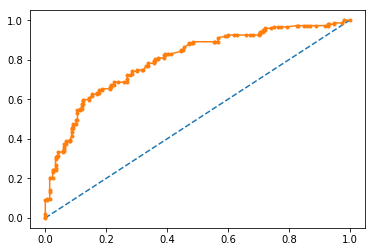

f1=0.600 AUC=0.799 ap=0.749
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       208
           1       0.77      0.49      0.60       147

   micro avg       0.73      0.73      0.73       355
   macro avg       0.74      0.69      0.70       355
weighted avg       0.74      0.73      0.71       355



In [24]:
#Testing Logistic Regression
model = LogisticRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(confusion_matrix(yTest, yPred))
probs = model.predict_proba(xTest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
# calculate AUC
auc = roc_auc_score(yTest, probs)
yhat = model.predict(xTest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(yTest, probs)
# calculate F1 score
f1 = f1_score(yTest, yhat)
# # calculate average precision score
ap = average_precision_score(yTest, probs)
print('f1=%.3f AUC=%.3f ap=%.3f' % (f1, auc, ap))
print(classification_report(yTest, yPred))

C:\Users\sgandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[183  25]
 [ 64  83]]


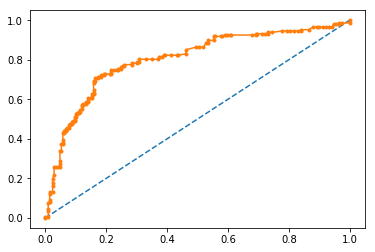

f1=0.651 AUC=0.804 ap=0.733
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       208
           1       0.77      0.56      0.65       147

   micro avg       0.75      0.75      0.75       355
   macro avg       0.75      0.72      0.73       355
weighted avg       0.75      0.75      0.74       355



In [25]:
#Testing Support Vector Machine
model = SVC(probability = True)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(confusion_matrix(yTest, yPred))
probs = model.predict_proba(xTest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
# calculate AUC
auc = roc_auc_score(yTest, probs)
yhat = model.predict(xTest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(yTest, probs)
# calculate F1 score
f1 = f1_score(yTest, yhat)
# # calculate average precision score
ap = average_precision_score(yTest, probs)
print('f1=%.3f AUC=%.3f ap=%.3f' % (f1, auc, ap))
print(classification_report(yTest, yPred))

[[186  22]
 [ 40 107]]


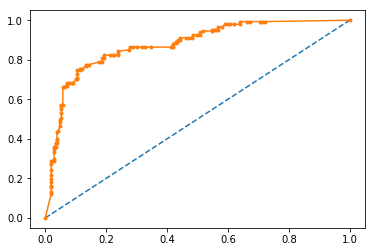

f1=0.775 AUC=0.877 ap=0.811
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       208
           1       0.83      0.73      0.78       147

   micro avg       0.83      0.83      0.83       355
   macro avg       0.83      0.81      0.82       355
weighted avg       0.83      0.83      0.82       355



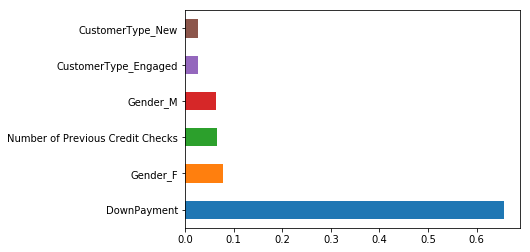

In [45]:
#Testing RandomForest - Also added Feature importance graph as this one is the best performing model
model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(confusion_matrix(yTest, yPred))
probs = model.predict_proba(xTest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
# calculate AUC
auc = roc_auc_score(yTest, probs)
yhat = model.predict(xTest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(yTest, probs)
# calculate F1 score
f1 = f1_score(yTest, yhat)
# # calculate average precision score
ap = average_precision_score(yTest, probs)
print('f1=%.3f AUC=%.3f ap=%.3f' % (f1, auc, ap))
print(classification_report(yTest, yPred))
(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(6)
   .plot(kind='barh')) 

[[186  22]
 [ 41 106]]


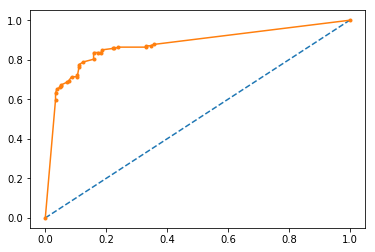

f1=0.771 AUC=0.875 ap=0.838
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       208
           1       0.83      0.72      0.77       147

   micro avg       0.82      0.82      0.82       355
   macro avg       0.82      0.81      0.81       355
weighted avg       0.82      0.82      0.82       355



In [30]:
#Testing Descision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(confusion_matrix(yTest, yPred))
probs = model.predict_proba(xTest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
# calculate AUC
auc = roc_auc_score(yTest, probs)
yhat = model.predict(xTest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(yTest, probs)
# calculate F1 score
f1 = f1_score(yTest, yhat)
# # calculate average precision score
ap = average_precision_score(yTest, probs)
print('f1=%.3f AUC=%.3f ap=%.3f' % (f1, auc, ap))
print(classification_report(yTest, yPred))

[[186  22]
 [ 64  83]]


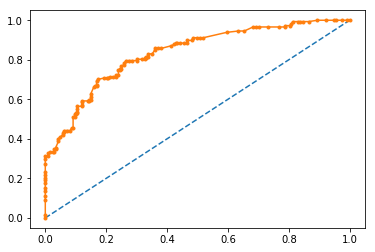

f1=0.659 AUC=0.834 ap=0.804
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       208
           1       0.79      0.56      0.66       147

   micro avg       0.76      0.76      0.76       355
   macro avg       0.77      0.73      0.74       355
weighted avg       0.76      0.76      0.75       355



In [36]:
#Testing XGBoost
model = XGBClassifier()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(confusion_matrix(yTest, yPred))
probs = model.predict_proba(xTest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
# calculate AUC
auc = roc_auc_score(yTest, probs)
yhat = model.predict(xTest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(yTest, probs)
# calculate F1 score
f1 = f1_score(yTest, yhat)
# # calculate average precision score
ap = average_precision_score(yTest, probs)
print('f1=%.3f AUC=%.3f ap=%.3f' % (f1, auc, ap))
print(classification_report(yTest, yPred))

In [64]:
#Unsupervised Learning
kmeans = KMeans(n_clusters=8, random_state=0).fit(df2)
labels = kmeans.labels_
df2['clusters'] = labels
print (df2.groupby(['clusters']).mean())
print(df2.clusters.value_counts())

              Sale  Number of Previous Credit Checks  DownPayment  Gender_F  \
clusters                                                                      
0         0.267068                          0.100402     9.479797  0.190763   
1         0.647059                          1.176471   238.189068  0.470588   
2         0.646154                          0.507692    78.447845  0.276923   
3         0.457286                          0.814070    26.735653  0.201005   
4         1.000000                          0.333333   512.329600  0.333333   
5         0.777778                          0.666667   146.252983  0.444444   
6         0.513889                          0.666667    50.030619  0.125000   
7         0.733333                          0.933333   112.934387  0.333333   

          Gender_M  Gender_O  Generation_BabyBoomers  Generation_Gen X  \
clusters                                                                 
0         0.795181  0.014056                0.489960         